# Examining the One-Slab Buffer Region in Detail for Each Slab

Each slab has one slab at each side. A slab can have an uncracked slab (B, NC), a mildly damaged
slab (T1, L1), or a critically damaged slab (T2, L2, CC, SS) near it, or a combination of two of these
categories. Does the type of slabs in the immediate vicinity of a certain slab of interest influence its
likelihood of that slab deteriorating further in a given year?

In [31]:
import numpy as np
import pandas as pd
import sys
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import math
sys.path.append('..\\custom_libraries')

# Custom library to analyze NC rate of deterioration
import rate_analysis

df = pd.read_csv('../../spreadsheet_data/i16WB_tag_replaced.csv')

In [32]:
initial_state_arr = np.array([])
class_arr = np.array([])
det_arr = np.array([])
for year in range(2014, 2018):
    initial_states = df[str(year)].to_numpy()
    class_state = rate_analysis.categorize_proximity(df, str(year))
    det = rate_analysis.has_deteriorated(df, str(year), str(year+1))
    initial_state_arr = np.append(initial_state_arr, initial_states)
    class_arr = np.append(class_arr, class_state)
    det_arr = np.append(det_arr, det)

state_df = pd.DataFrame({'initial_state': initial_state_arr, 'class': class_arr, 'det': det_arr})

state_df = state_df[state_df['initial_state'] != 'SS']
state_df = state_df[state_df['initial_state'] != 'R']
state_df = state_df[state_df['initial_state'] != 'B']

In [33]:
def plot_bar_chart(df, title, included_slabs):
    df = df[df['initial_state'].isin(included_slabs)]
    chance = []
    x_label = ['Both Undamaged', 'One Mild, One Undamaged', 'Two Mild', 'One Critical, One Undamaged', 'One Critical, One Mild', 'Two Critical']
    n = []
    
    
    for group in range(6):
        temp = df[df['class'] == group]
        if len(temp) == 0:
            chance.append(0)
        else:
            chance.append(len(temp[temp['det'] == True])/len(temp))
    
        n.append(len(temp))
    combined_df = pd.DataFrame({ 'x_label': x_label, 'chance': chance, 'n': n})
    combined_df.plot(kind='bar', x='x_label', y='chance', title=title, color='blue')

    plt.xlabel('Average State')
    plt.ylabel('Chance of Deterioration')
    return combined_df

# Analyzing All Slabs
Using the Chi-Square goodness-of-fit test, it can be determined if the types of slabs that are directly across from a given slab will influence the slab's deterioration rate. However, some values are too small (not satisfying the $\geq$ 5 condition for most expected counts) so the Fisher's test can be used as a replacement. With the Fisher's test, it is assumed that there is no associations between the two variables of interest (which will be the null hypothesis).

$H_0$: There is no association between the pavement status directly near a slab and the deterioration behavior.

Using $\alpha = 0.05$ with $p \approx 0$ under the Fisher's Test, the $H_0$ can be rejected, supporting the fact that pavement status directly near a slab strongly influences pavement deterioration behavior.

,x_label,chance,n
0,Both Undamaged,0.030426,5653
1,"One Mild, One Undamaged",0.076779,534
2,Two Mild,0.047619,21
3,"One Critical, One Undamaged",0.111330,2030
4,"One Critical, One Mild",0.141026,156
5,Two Critical,0.136213,602


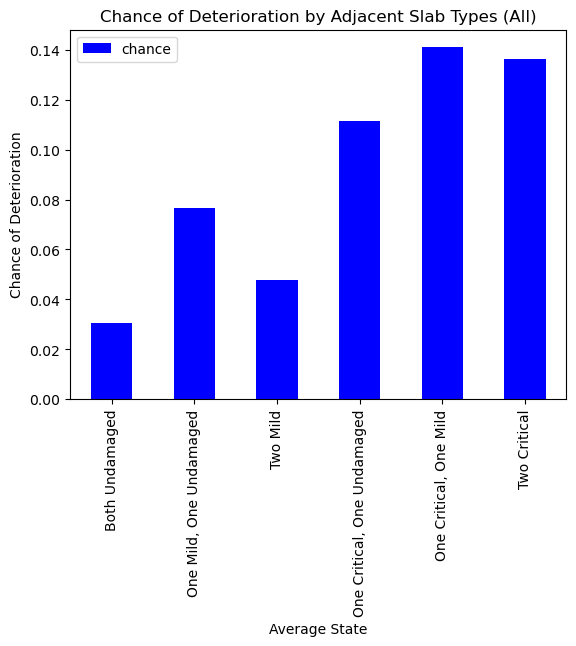

In [34]:
plot_bar_chart(state_df, 'Chance of Deterioration by Adjacent Slab Types (All)', {'NC', 'L1', 'T1', 'L2', 'T2', 'CC'})

,x_label,chance,n
0,Both Undamaged,0.017413,5226
1,"One Mild, One Undamaged",0.058685,426
2,Two Mild,0.055556,18
3,"One Critical, One Undamaged",0.083580,1352
4,"One Critical, One Mild",0.112245,98
5,Two Critical,0.104317,278


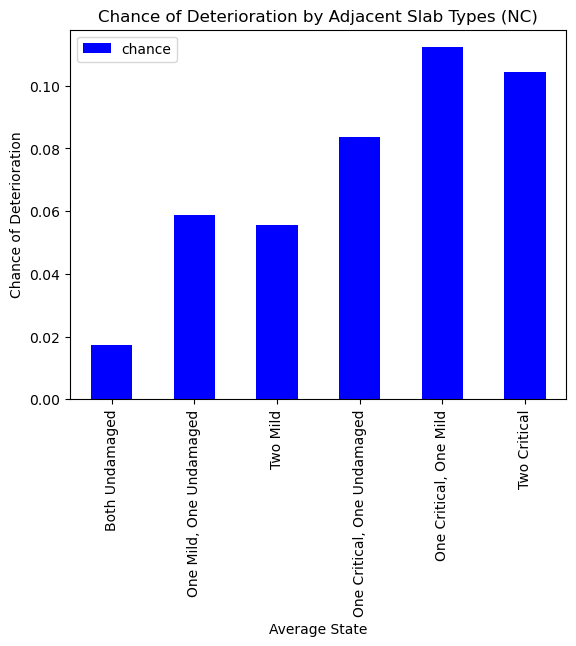

In [35]:
plot_bar_chart(state_df, 'Chance of Deterioration by Adjacent Slab Types (NC)', {'NC'})

,x_label,chance,n
0,Both Undamaged,0.359116,181
1,"One Mild, One Undamaged",0.238095,42
2,Two Mild,0.000000,0
3,"One Critical, One Undamaged",0.415094,159
4,"One Critical, One Mild",0.666667,12
5,Two Critical,0.714286,28


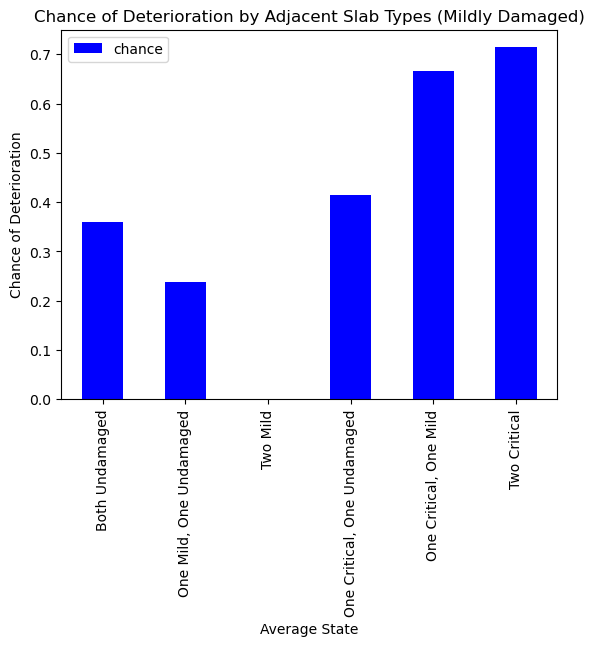

In [36]:
plot_bar_chart(state_df, 'Chance of Deterioration by Adjacent Slab Types (Mildly Damaged)', {'T1', 'L1'})

,x_label,chance,n
0,Both Undamaged,0.065041,246
1,"One Mild, One Undamaged",0.090909,66
2,Two Mild,0.000000,3
3,"One Critical, One Undamaged",0.090559,519
4,"One Critical, One Mild",0.065217,46
5,Two Critical,0.111486,296


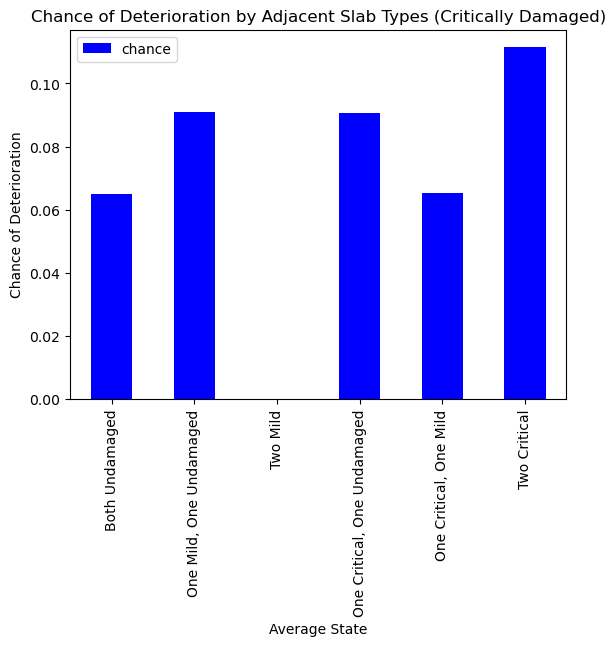

In [37]:
plot_bar_chart(state_df, 'Chance of Deterioration by Adjacent Slab Types (Critically Damaged)', {'T2', 'L2', 'CC'})